# Forecasing Number of cases with Prophet

In [128]:
import pandas as pd
from fbprophet import Prophet

In [7]:
df = pd.read_excel('corona.xlsx', index_col=0).reset_index()

In [8]:
df.columns

Index([   'Province/State',    'Country/Region', 2020-01-22 00:00:00,
       2020-01-23 00:00:00, 2020-01-24 00:00:00, 2020-01-25 00:00:00,
       2020-01-26 00:00:00, 2020-01-27 00:00:00, 2020-01-28 00:00:00,
       2020-01-29 00:00:00, 2020-01-30 00:00:00, 2020-01-31 00:00:00,
       2020-02-01 00:00:00, 2020-02-02 00:00:00, 2020-02-03 00:00:00,
       2020-02-04 00:00:00, 2020-02-05 00:00:00, 2020-02-06 00:00:00,
       2020-02-07 00:00:00, 2020-02-08 00:00:00, 2020-02-09 00:00:00,
       2020-02-10 00:00:00, 2020-02-11 00:00:00, 2020-02-12 00:00:00,
       2020-02-13 00:00:00, 2020-02-14 00:00:00, 2020-02-15 00:00:00,
       2020-02-16 00:00:00, 2020-02-17 00:00:00, 2020-02-18 00:00:00,
       2020-02-19 00:00:00, 2020-02-20 00:00:00, 2020-02-21 00:00:00,
       2020-02-22 00:00:00, 2020-02-23 00:00:00, 2020-02-24 00:00:00,
       2020-02-25 00:00:00, 2020-02-26 00:00:00, 2020-02-27 00:00:00,
       2020-02-28 00:00:00, 2020-02-29 00:00:00, 2020-03-01 00:00:00,
       2020-03-02 00

In [10]:
set(df['Country/Region'])

{'Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahrain',
 'Bangladesh',
 'Belarus',
 'Belgium',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cayman Islands',
 'Central African Republic',
 'Chile',
 'China',
 'Colombia',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cruise Ship',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'Equatorial Guinea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Finland',
 'France',
 'Gabon',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Guadeloupe',
 'Guatemala',
 'Guernsey',
 'Guinea',
 'Guyana',
 'Holy See',
 'Honduras',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iran',
 'Iraq',
 'Ireland',
 'Israel',
 'Italy',
 'Jamaica',
 'Japan',
 'Jersey',
 'Jordan'

In [17]:
provinces_states = set(df[df['Country/Region'] == 'US']['Province/State'])

In [75]:
ca_ones = [province for province in provinces_states if 'CA' in province]

In [76]:
ca_ones

['Orange County, CA',
 'Riverside County, CA',
 'Santa Clara County, CA',
 'Sonoma County, CA',
 'Napa, CA',
 'San Diego County, CA',
 'Ventura, CA',
 'Solano, CA',
 'Los Angeles, CA',
 'Humboldt County, CA',
 'San Francisco County, CA',
 'Contra Costa County, CA',
 'Shasta County, CA',
 'Stanislaus, CA',
 'Santa Cruz, CA',
 'San Mateo, CA',
 'Fresno County, CA',
 'Placer County, CA',
 'San Joaquin, CA',
 'Marin, CA',
 'Alameda County, CA',
 'San Benito, CA',
 'Yolo County, CA',
 'Madera County, CA',
 'Calaveras, CA',
 'Sacramento County, CA']

In [227]:
df[df['Country/Region'] == 'China']

,Province/State,Country/Region,2020-01-22 00:00:00,2020-01-23 00:00:00,2020-01-24 00:00:00,2020-01-25 00:00:00,2020-01-26 00:00:00,2020-01-27 00:00:00,2020-01-28 00:00:00,2020-01-29 00:00:00,...,2020-03-06 00:00:00,2020-03-07 00:00:00,2020-03-08 00:00:00,2020-03-09 00:00:00,2020-03-10 00:00:00,2020-03-11 00:00:00,2020-03-12 00:00:00,2020-03-13 00:00:00,2020-03-14 00:00:00,2020-03-15 00:00:00
0,Hubei,China,444,444,549,761,1058,1423,3554,3554,...,67592,67666,67707,67743,67760,67773,67781,67786,67790,67794
8,Guangdong,China,26,32,53,78,111,151,207,277,...,1352,1352,1352,1352,1353,1356,1356,1356,1356,1360
9,Henan,China,5,5,9,32,83,128,168,206,...,1272,1272,1272,1272,1272,1273,1273,1273,1273,1273
10,Zhejiang,China,10,27,43,62,104,128,173,296,...,1215,1215,1215,1215,1215,1215,1215,1215,1227,1231
13,Hunan,China,4,9,24,43,69,100,143,221,...,1018,1018,1018,1018,1018,1018,1018,1018,1018,1018
14,Anhui,China,1,9,15,39,60,70,106,152,...,990,990,990,990,990,990,990,990,990,990
17,Jiangxi,China,2,7,18,18,36,72,109,109,...,935,935,935,935,935,935,935,935,935,935
20,Shandong,China,2,6,15,27,46,75,95,130,...,758,758,758,758,758,760,760,760,760,760
24,Jiangsu,China,1,5,9,18,33,47,70,99,...,631,631,631,631,631,631,631,631,631,631
25,Chongqing,China,6,9,27,57,75,110,132,147,...,576,576,576,576,576,576,576,576,576,576


## Santa Clara

In [273]:
santa_clara = df[df['Province/State'] == 'Santa Clara County, CA']

In [274]:
santa_clara

,Province/State,Country/Region,2020-01-22 00:00:00,2020-01-23 00:00:00,2020-01-24 00:00:00,2020-01-25 00:00:00,2020-01-26 00:00:00,2020-01-27 00:00:00,2020-01-28 00:00:00,2020-01-29 00:00:00,...,2020-03-06 00:00:00,2020-03-07 00:00:00,2020-03-08 00:00:00,2020-03-09 00:00:00,2020-03-10 00:00:00,2020-03-11 00:00:00,2020-03-12 00:00:00,2020-03-13 00:00:00,2020-03-14 00:00:00,2020-03-15 00:00:00
353,"Santa Clara County, CA",US,0,0,0,0,0,0,0,0,...,20,32,38,38,0,0,0,0,0,0


In [275]:
transposed = santa_clara.transpose().reset_index().drop([0,1])
transposed.columns = ['date','num']

In [277]:
transposed

,date,num
2,2020-01-22 00:00:00,0
3,2020-01-23 00:00:00,0
4,2020-01-24 00:00:00,0
5,2020-01-25 00:00:00,0
6,2020-01-26 00:00:00,0
7,2020-01-27 00:00:00,0
8,2020-01-28 00:00:00,0
9,2020-01-29 00:00:00,0
10,2020-01-30 00:00:00,0
11,2020-01-31 00:00:00,1


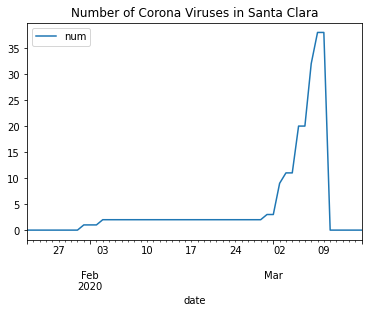

In [204]:
transposed.plot(x='date', y='num', kind='line', title='Number of Corona Viruses in Santa Clara')

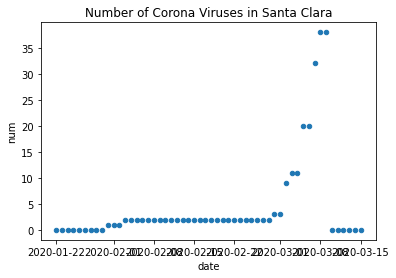

In [205]:
transposed.plot(x='date', y='num', kind='scatter', title='Number of Corona Viruses in Santa Clara')

This looks like the cumulative data? so after 9th it probably it still 38 or higher. remove data after row 50

In [206]:
transposed['date'] = pd.to_datetime(transposed.date)

In [207]:
transposed

,date,num
2,2020-01-22,0
3,2020-01-23,0
4,2020-01-24,0
5,2020-01-25,0
6,2020-01-26,0
7,2020-01-27,0
8,2020-01-28,0
9,2020-01-29,0
10,2020-01-30,0
11,2020-01-31,1


In [208]:
end_date = '2020-03-10'
transposed = transposed[transposed.date < end_date]

In [211]:
train = transposed[transposed.date >='2020-02-28']
train.columns = ['ds', 'y']

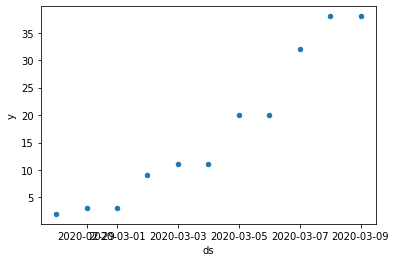

In [212]:
train.plot(x='ds', y='y', kind='scatter')

In [213]:
m = Prophet()
m.fit(train)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.


In [214]:
# Python
future = m.make_future_dataframe(periods=14)
future.head()

,ds
0,2020-02-28
1,2020-02-29
2,2020-03-01
3,2020-03-02
4,2020-03-03


In [215]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
20,2020-03-19,76.690602,71.904578,81.093662
21,2020-03-20,80.670252,76.210079,85.388922
22,2020-03-21,84.649901,80.246007,89.087570
23,2020-03-22,88.629551,84.146912,93.050394
24,2020-03-23,92.609200,88.073490,97.123500


In [222]:
import matplotlib.pyplot as plt

In [ ]:
plt.tit

Text(0.5, 1.0, 'Corona Viruses in Santa Clara')

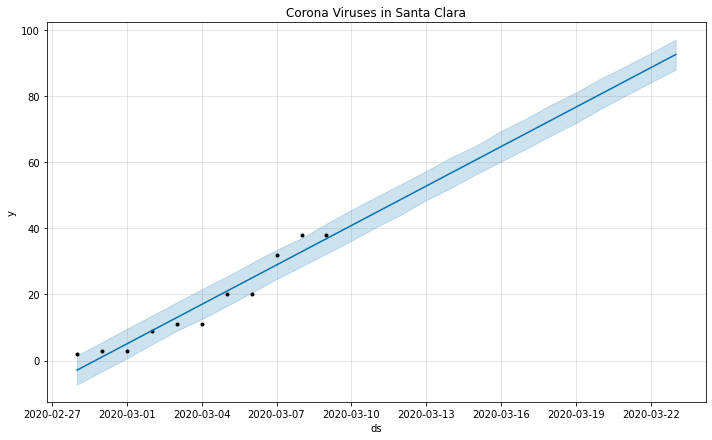

In [226]:
# Python
fig1 = m.plot(forecast)
plt.title('Corona Viruses in Santa Clara')

## HUnan

In [279]:
c = 'Hunan'

In [280]:
pro = df[df['Province/State'] == c]
transposed = pro.transpose().reset_index().drop([0,1])
transposed.columns = ['date','num']

In [285]:
transposed.head()

,date,num
2,2020-01-22 00:00:00,4
3,2020-01-23 00:00:00,9
4,2020-01-24 00:00:00,24
5,2020-01-25 00:00:00,43
6,2020-01-26 00:00:00,69


In [291]:
transposed['date'] = transposed['date'] + pd.DateOffset(days=40)

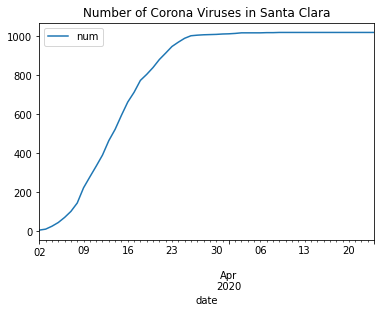

In [292]:
transposed.plot(x='date', y='num', kind='line', title='Number of Corona Viruses in Santa Clara')

In [307]:
transposed.y

2        4
3        9
4       24
5       43
6       69
7      100
8      143
9      221
10     277
11     332
12     389
13     463
14     521
15     593
16     661
17     711
18     772
19     803
20     838
21     879
22     912
23     946
24     968
25     988
26    1001
27    1004
28    1006
29    1007
30    1008
31    1010
32    1011
33    1013
34    1016
35    1016
36    1016
37    1016
38    1017
39    1017
40    1018
41    1018
42    1018
43    1018
44    1018
45    1018
46    1018
47    1018
48    1018
49    1018
50    1018
51    1018
52    1018
53    1018
54    1018
55    1018
Name: y, dtype: object

In [305]:
(1000 / 67_370_000) * 1_938_000

28.766513284844887

In [293]:
train = transposed
train.columns = ['ds', 'y']
train['cap'] = 1000
train['floor'] = 10

In [294]:
future.head()

,ds,floor,cap
0,2020-01-22,0,1000
1,2020-01-23,0,1000
2,2020-01-24,0,1000
3,2020-01-25,0,1000
4,2020-01-26,0,1000


In [299]:
m = Prophet(growth='logistic')
m.fit(train)
# Python
future = m.make_future_dataframe(periods=14)
future['floor'] = 0
future['cap'] = 1000
future.head()
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
63,2020-05-04,1000.898741,975.849475,1026.943148
64,2020-05-05,1000.430664,976.137251,1024.823387
65,2020-05-06,1002.035279,976.976791,1026.575612
66,2020-05-07,1000.068075,974.740454,1026.806932
67,2020-05-08,1000.411459,974.116107,1026.174805


Text(0.5, 1.0, 'Corona Viruses in Santa Clara')

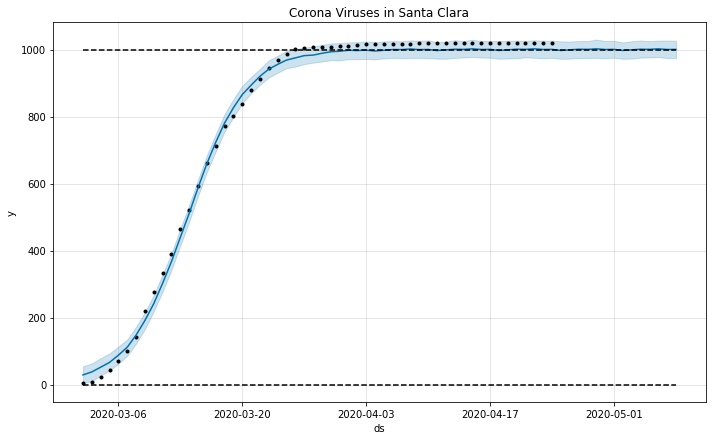

In [300]:
# Python
fig1 = m.plot(forecast)
plt.title('Corona Viruses in Santa Clara')